# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

import joblib
import os

## Data import and cleaning

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()
print("Data shape:",df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Data shape: (1025, 14)


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print("Missing values:")
print(df.isnull().sum())
#print(df.isnull().sum())

print("Column names:",df.columns)

print("Duplicate rows:", df.duplicated().sum())

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Column names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Duplicate rows: 723


In [6]:
df_orig = df.copy()
df = df.drop_duplicates().reset_index(drop=True)

# New shape
print("Shape after removing duplicates:", df.shape)

print("\nSummary Statistics (Numerical):")
print(df.describe())

Shape after removing duplicates: (302, 14)

Summary Statistics (Numerical):
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815

## EDA

#### Target Variable Distribution

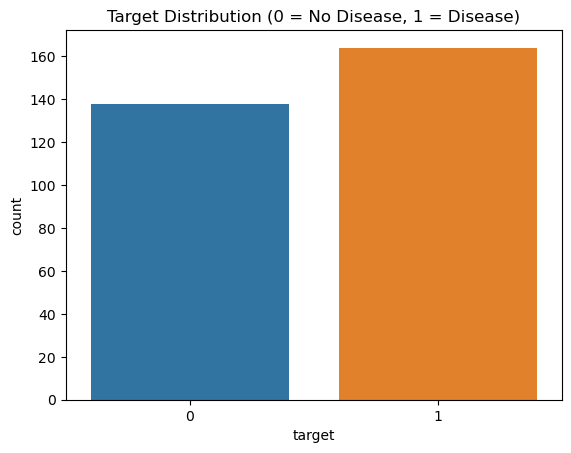

1    0.543046
0    0.456954
Name: target, dtype: float64


In [7]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

print(df['target'].value_counts(normalize=True))

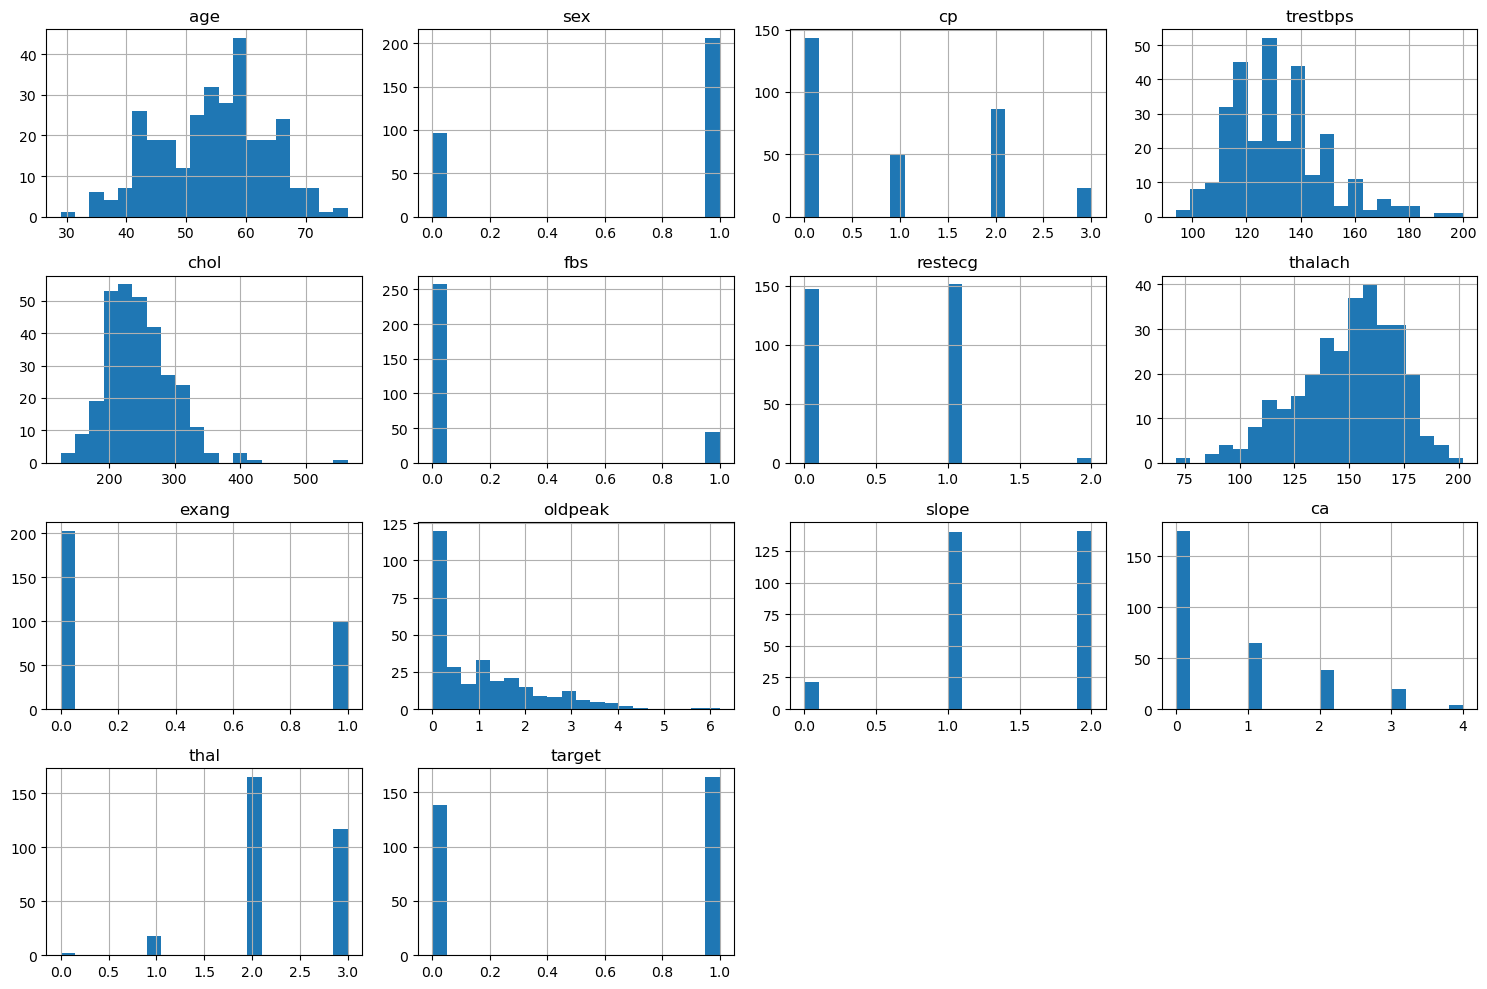

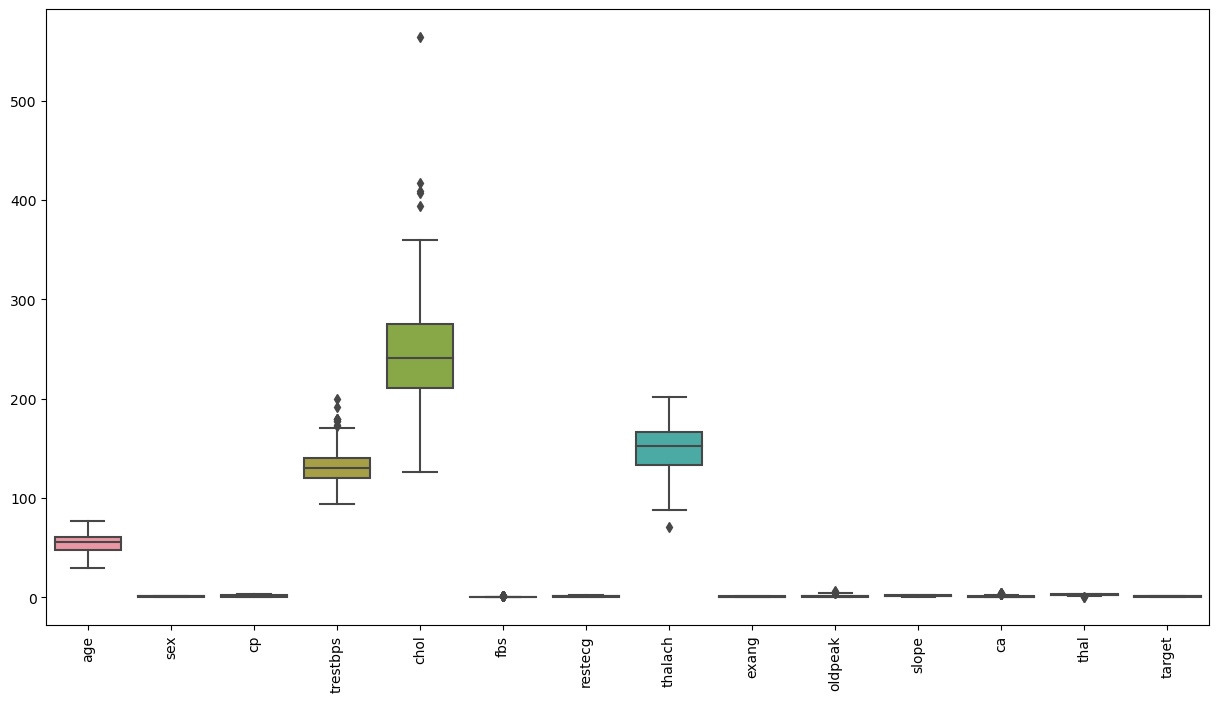

In [8]:
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

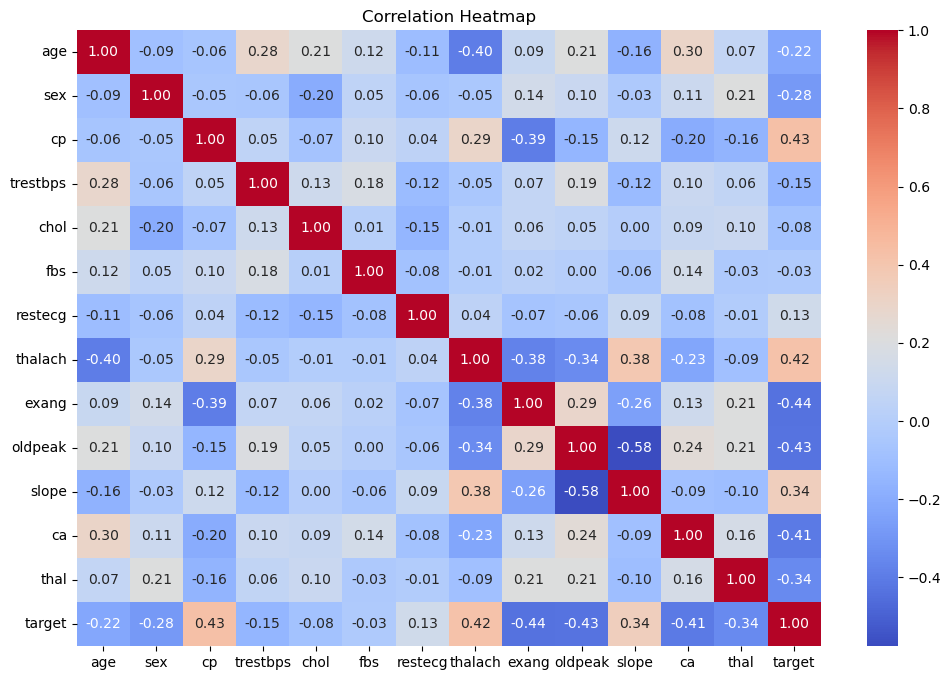

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)

Outliers in each column:
 age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          24
thal         2
target       0
dtype: int64


#### Bivariate Analysis (Feature vs Target)

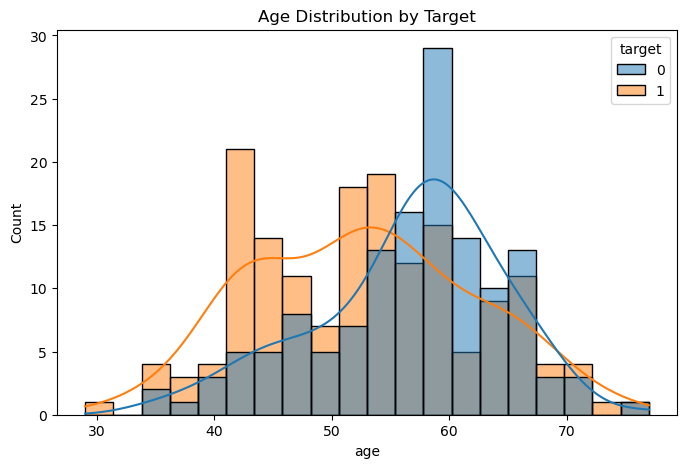

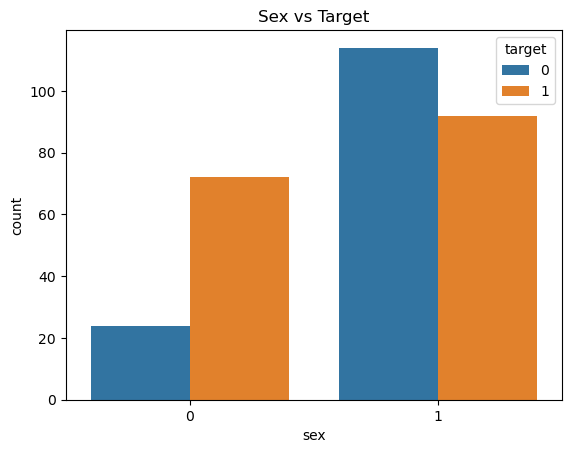

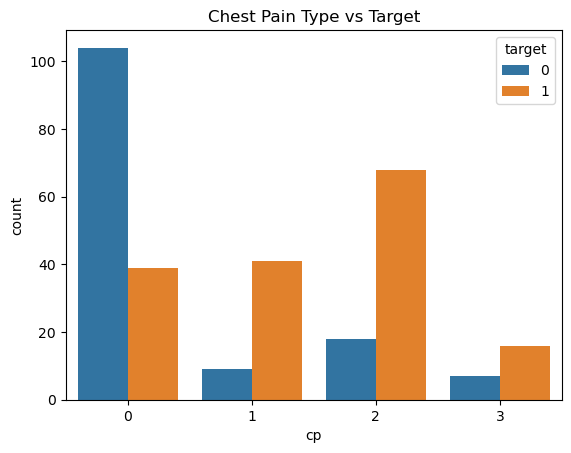

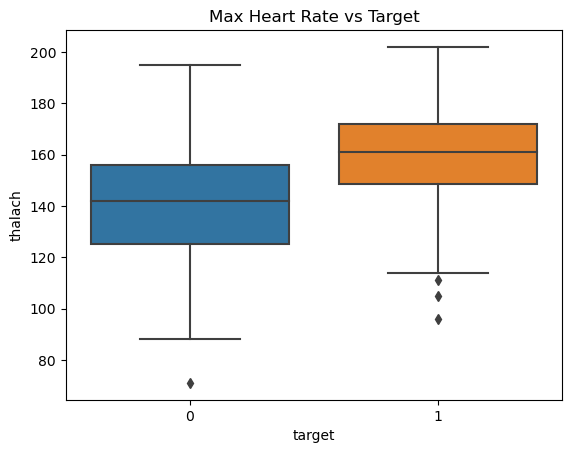

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Example: Age distribution by target
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="target", bins=20, kde=True)
plt.title("Age Distribution by Target")
plt.show()

sns.countplot(x="sex", hue="target", data=df)
plt.title("Sex vs Target")
plt.show()

# Chest Pain Type vs Target
sns.countplot(x="cp", hue="target", data=df)
plt.title("Chest Pain Type vs Target")
plt.show()

# Max Heart Rate vs Target
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Max Heart Rate vs Target")
plt.show()

### Preprocessing

#### Separate Features and Target


In [12]:
X = df.drop('target', axis=1)
Y = df['target']

print("Feature shape:", X.shape)
print("Target shape:", Y.shape)

Feature shape: (302, 13)
Target shape: (302,)


#### Train-Test Split

In [13]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (241, 13)
Test shape: (61, 13)


In [14]:
# Identify numeric columns (all are numeric, but some are categorical codes)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Baseline modelling

In [15]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 3: Train, evaluate, and cross-validate
cv_results = {}

for name, model in models.items():
    print(f"--- {name} ---")
    
    # Scale features only for models sensitive to feature scale
    if name in ["Logistic Regression", "SVM", "Naive Bayes"]:
        X_model_train = X_train_scaled
        X_model_test = X_test_scaled
    else:
        X_model_train = X_train
        X_model_test = X_test
    
    # Fit model
    model.fit(X_model_train, Y_train)
    
    # Predictions
    Y_pred = model.predict(X_model_test)
    Y_prob = model.predict_proba(X_model_test)[:, 1]
    
    # Accuracy & ROC-AUC
    acc = accuracy_score(Y_test, Y_pred)
    roc = roc_auc_score(Y_test, Y_prob)
    
    # 5-Fold Cross Validation Accuracy
    cv_acc = cross_val_score(model, X_model_train, Y_train, cv=5, scoring='accuracy')
    
    cv_results[name] = {
        "Test Accuracy": acc,
        "Test ROC-AUC": roc,
        "CV Accuracy Mean": cv_acc.mean(),
        "CV Accuracy Std": cv_acc.std()
    }
    
    print(f"Test Accuracy: {acc:.4f}, Test ROC-AUC: {roc:.4f}")
    print(f"5-Fold CV Accuracy: Mean={cv_acc.mean():.4f}, Std={cv_acc.std():.4f}")
    print("\n")

# Step 4: Summary Table
cv_results_df = pd.DataFrame(cv_results).T.sort_values(by="Test Accuracy", ascending=False)
print("Summary of all models with CV:\n", cv_results_df)

--- Logistic Regression ---
Test Accuracy: 0.8033, Test ROC-AUC: 0.8701
5-Fold CV Accuracy: Mean=0.8216, Std=0.0210


--- Random Forest ---
Test Accuracy: 0.7541, Test ROC-AUC: 0.8615
5-Fold CV Accuracy: Mean=0.8132, Std=0.0300


--- Decision Tree ---
Test Accuracy: 0.8033, Test ROC-AUC: 0.8019
5-Fold CV Accuracy: Mean=0.7263, Std=0.0414


--- Naive Bayes ---
Test Accuracy: 0.7869, Test ROC-AUC: 0.8842
5-Fold CV Accuracy: Mean=0.8008, Std=0.0614


--- SVM ---
Test Accuracy: 0.7869, Test ROC-AUC: 0.8517
5-Fold CV Accuracy: Mean=0.8256, Std=0.0221


--- LightGBM ---
Test Accuracy: 0.7213, Test ROC-AUC: 0.8323
5-Fold CV Accuracy: Mean=0.8214, Std=0.0453


--- XGBoost ---
Test Accuracy: 0.7213, Test ROC-AUC: 0.8398
5-Fold CV Accuracy: Mean=0.8132, Std=0.0194


Summary of all models with CV:
                      Test Accuracy  Test ROC-AUC  CV Accuracy Mean  \
Logistic Regression       0.803279      0.870130          0.821599   
Decision Tree             0.803279      0.801948          0.7

### Final models with Hyperparameter tuning

In [16]:
# Hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Naive Bayes": {},  # No tunable params for GaussianNB
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["rbf", "linear"],
        "gamma": ["scale", "auto"]
    },
    "LightGBM": {
        "num_leaves": [15, 31, 63],
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [50, 100, 200]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200]
    },
}

cv_results = {}
best_params_dict = {}

for name, model in models.items():
    print(f"\n================ {name} ================\n")

    # Choose correct data (scaled/unscaled)
    if name in ["Logistic Regression", "SVM", "Naive Bayes"]:
        X_model_train = X_train_scaled
        X_model_test = X_test_scaled
    else:
        X_model_train = X_train
        X_model_test = X_test

    # ---- HYPERPARAMETER TUNING ----
    grid = param_grids.get(name, {})

    if grid:  # Only tune if grid not empty
        print("Running GridSearchCV...")
        gs = GridSearchCV(
            estimator=model,
            param_grid=grid,
            scoring="accuracy",
            cv=5,
            n_jobs=-1
        )
        gs.fit(X_model_train, Y_train)
        best_model = gs.best_estimator_

        print(f"Best Params: {gs.best_params_}")
    else:
        print("No hyperparameters to tune. Using default model.")
        best_model = model
        best_model.fit(X_model_train, Y_train)

    # ---- TRAIN USING BEST MODEL ----
    best_model.fit(X_model_train, Y_train)

    # Predictions
    Y_pred = best_model.predict(X_model_test)
    Y_prob = best_model.predict_proba(X_model_test)[:, 1]

    # Metrics
    acc = accuracy_score(Y_test, Y_pred)
    roc = roc_auc_score(Y_test, Y_prob)

    # CV Accuracy
    cv_acc = cross_val_score(best_model, X_model_train, Y_train, cv=5, scoring='accuracy')
    best_params_dict[name] = grid if not grid else gs.best_params_

    cv_results[name] = {
        "Best Params": grid if not grid else gs.best_params_,
        "Test Accuracy": acc,
        "Test ROC-AUC": roc,
        "CV Accuracy Mean": cv_acc.mean(),
        "CV Accuracy Std": cv_acc.std()
    }

    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test ROC-AUC: {roc:.4f}")
    print(f"CV Mean: {cv_acc.mean():.4f}, Std: {cv_acc.std():.4f}")

# ---- SUMMARY TABLE ----
cv_results_df = pd.DataFrame(cv_results).T
print("\nFinal Model Comparison:\n")
print(cv_results_df)



================ Logistic Regression ================

Running GridSearchCV...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8197
Test ROC-AUC: 0.8723
CV Mean: 0.8298, Std: 0.0166

================ Random Forest ================

Running GridSearchCV...
Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 500}
Test Accuracy: 0.7705
Test ROC-AUC: 0.8734
CV Mean: 0.8422, Std: 0.0317

================ Decision Tree ================

Running GridSearchCV...
Best Params: {'max_depth': 5, 'min_samples_split': 2}
Test Accuracy: 0.7705
Test ROC-AUC: 0.8317
CV Mean: 0.7678, Std: 0.0492

================ Naive Bayes ================

No hyperparameters to tune. Using default model.
Test Accuracy: 0.7869
Test ROC-AUC: 0.8842
CV Mean: 0.8008, Std: 0.0614

================ SVM ================

Running GridSearchCV...
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.8197
Test ROC-AUC: 0.8701
CV Mean: 0.8256, Std: 0.0257


**Model Performance Summary**

After initial training, Logistic Regression led with the highest test accuracy (0.803) and excellent stability (CV std: 0.021), while Naive Bayes achieved the best ROC-AUC (0.884). Ensemble methods showed promise but lower test accuracies, indicating they needed better tuning. Hyperparameter optimisation shifted results: Random Forest improved to the highest CV accuracy mean (0.842), demonstrating that proper tuning unlocked its potential, while Naive Bayes continued to be the ROC-AUC champion (0.884) without requiring any tuning. Logistic Regression and SVM tied for highest test accuracy (0.820) with superior stability.

Random Forest offers the best generalisation after tuning, making it ideal for production environments. Naive Bayes excels at class separation with well-calibrated probabilities, optimal when ROC-AUC is critical. Logistic Regression and SVM provide the most reliable predictions with computational efficiency. Hyperparameter tuning proved most beneficial for tree-based models, while simpler algorithms like Logistic Regression and Naive Bayes demonstrated that algorithmic appropriateness often matters more than model complexity for binary classification tasks.

In [17]:
# ================================
# SELECT TOP 3 MODELS
# ================================

top3 = cv_results_df.sort_values(by="CV Accuracy Mean", ascending=False).head(3)
top3_models = top3.index.tolist()

print("\nTop 3 Models:", top3_models)

# Store fitted models for reuse
trained_models = {}
for name in top3_models:
    trained_models[name] = models[name]


Top 3 Models: ['Random Forest', 'Logistic Regression', 'SVM']


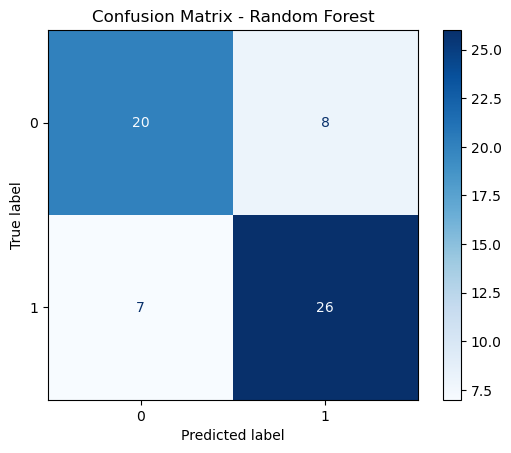

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



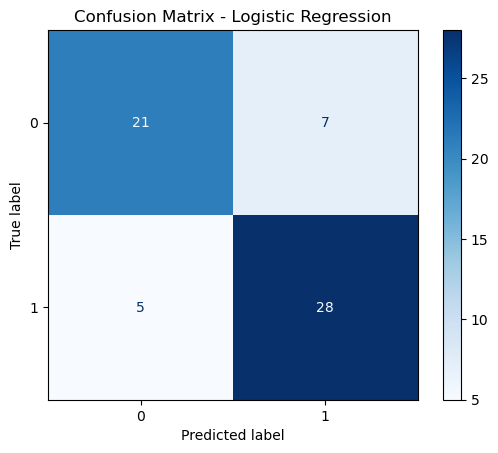

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



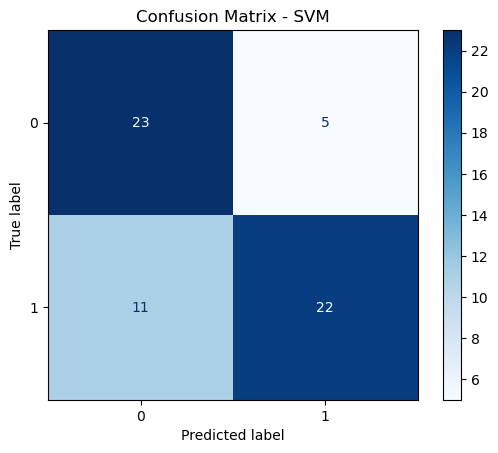

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74        28
           1       0.81      0.67      0.73        33

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [18]:
for name in top3_models:
    #print(f"\nConfusion Matrix — {name}")

    # Use correct input set (scaled / unscaled)
    if name in ["Logistic Regression", "SVM", "Naive Bayes"]:
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test

    model = models[name]

    if name in best_params_dict:
        model.set_params(**best_params_dict[name])
        
    preds = model.predict(X_test_used)

    cm = confusion_matrix(Y_test, preds)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print(f"Classification Report - {name}:\n", classification_report(Y_test, preds))


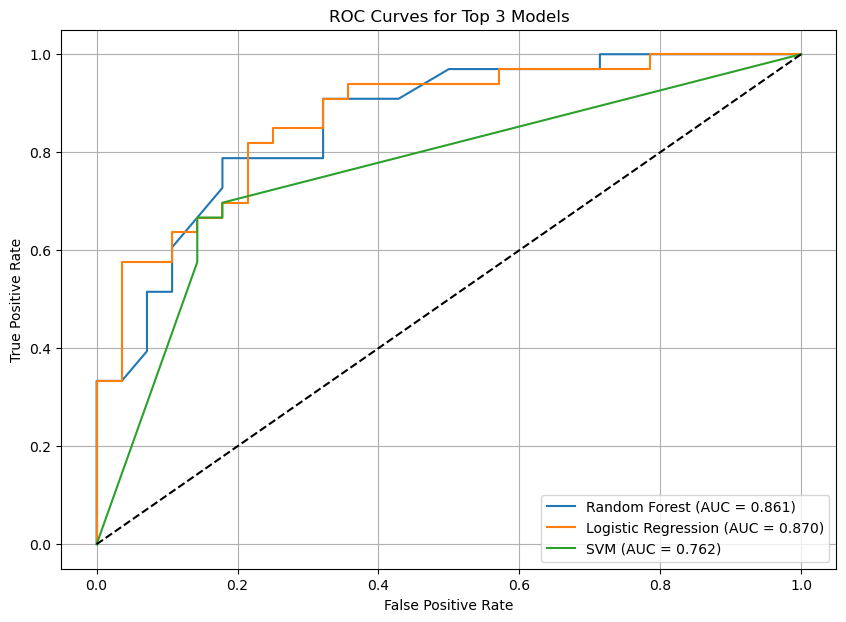

In [19]:
plt.figure(figsize=(10, 7))

for name in top3_models:

    if name in ["Logistic Regression", "SVM", "Naive Bayes"]:
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test

    model = models[name]
    y_prob = model.predict_proba(X_test_used)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Perfect classifier line
plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Top 3 Models")
plt.legend()
plt.grid(True)
plt.show()



=== Feature Importance — Random Forest ===
     Feature  Importance
2         cp    0.197615
11        ca    0.124198
7    thalach    0.121847
12      thal    0.120562
8      exang    0.091680
9    oldpeak    0.089911
0        age    0.059655
4       chol    0.052650
3   trestbps    0.048229
1        sex    0.039422
10     slope    0.032379
6    restecg    0.014814
5        fbs    0.007038


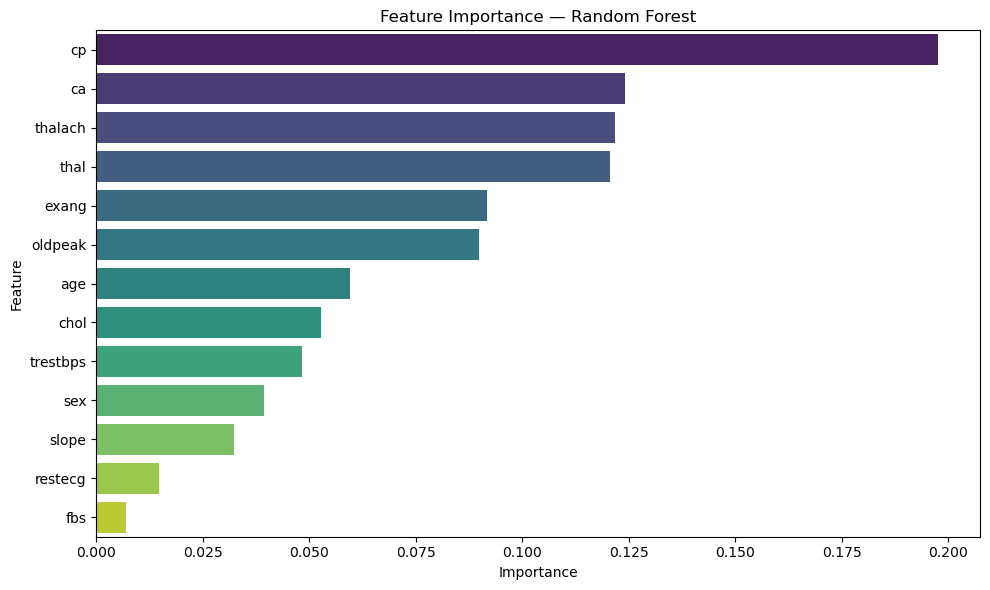


=== Feature Importance — Logistic Regression ===
     Feature  Coefficient
2         cp     0.713052
1        sex    -0.627031
11        ca    -0.525690
7    thalach     0.518499
12      thal    -0.515746
8      exang    -0.473263
9    oldpeak    -0.402516
10     slope     0.254275
6    restecg     0.191724
3   trestbps    -0.179858
4       chol    -0.127221
5        fbs    -0.075691
0        age     0.022075


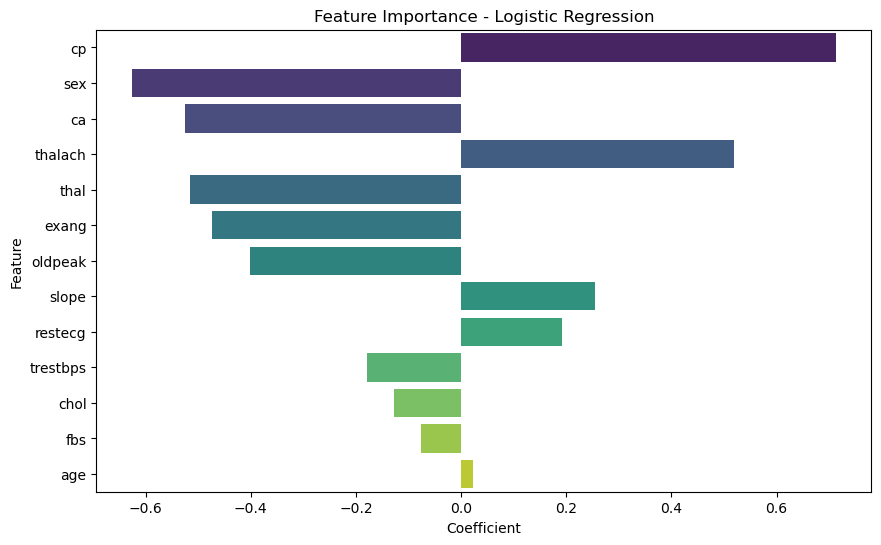


=== Feature Importance — SVM ===


In [20]:
'''
SVMs do not provide meaningful built-in feature importance. Linear SVMs produce coefficients, 
but these do not represent importance reliably because the margin-maximizing objective does not map cleanly to 
contribution strengths, and non-linear SVM kernels (RBF, Poly) provide no coefficients at all.
Since our goal is to interpret the models and compare feature importance across them, we can ignore the SVM model for this section.
'''


for name in top3_models:
    print(f"\n=== Feature Importance — {name} ===")

    # ------------------------------------------------------------
    # Choose scaled or unscaled input
    # ------------------------------------------------------------
    if name in ["Logistic Regression", "Naive Bayes"]:
        X_used = X_train_scaled
    else:
        X_used = X_train

    feature_names = X.columns

    # Load model
    model = models[name]

    # Apply best params
    if name in best_params_dict:
        model.set_params(**best_params_dict[name])

    # Fit model
    model.fit(X_used, Y_train)

    # ------------------------------------------------------------
    # 1. RANDOM FOREST — Gini importance
    # ------------------------------------------------------------
    if name == "Random Forest":
        importances = model.feature_importances_

        df_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

        print(df_imp)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_imp, x="Importance", y="Feature", palette="viridis")
        plt.title(f"Feature Importance — {name}")
        plt.tight_layout()
        plt.show()

    # ------------------------------------------------------------
    # 2. LOGISTIC REGRESSION — Signed Coefficients
    # ------------------------------------------------------------
    elif name == "Logistic Regression":
        coefs = model.coef_[0]

        df_imp = pd.DataFrame({
            "Feature": feature_names,
            "Coefficient": coefs
        }).sort_values(by='Coefficient', key=abs, ascending=False)

        print(df_imp)

        # Plotting
        plt.figure(figsize=(10,6))
        sns.barplot(x='Coefficient', y='Feature', data=df_imp, palette='viridis')
        plt.title('Feature Importance - Logistic Regression')
        plt.show()    

Feature importance helps us understand which input variables contribute most to a model’s predictions. In the Random Forest, importance is based on how much each feature reduces impurity across the trees, while in Logistic Regression, the magnitude of the coefficient indicates how strongly a feature influences the predicted outcome. Across both models, the top five most influential features are cp (chest pain type), ca (number of major vessels), thalach (maximum heart rate), thal (thalassemia), and exang (exercise-induced angina), suggesting these variables are key predictors in this dataset.

In [21]:
os.makedirs("saved_models", exist_ok=True)

for name in top3_models:
    file_path = f"saved_models/{name.replace(' ', '_')}.joblib"
    joblib.dump(models[name], file_path)
    print(f"Saved: {file_path}")

# Save scaler for numeric features
joblib.dump(scaler, "saved_models/scaler.joblib")

# Save feature order used for training
feature_order = X_train_scaled.columns.tolist()
joblib.dump(feature_order, "saved_models/feature_order.joblib")

Saved: saved_models/Random_Forest.joblib
Saved: saved_models/Logistic_Regression.joblib
Saved: saved_models/SVM.joblib


['saved_models/feature_order.joblib']